In [1]:
using LCIO
using StatsPlots
using LinearAlgebra: norm
using Corpuscles
gr()
theme(:gruvbox_dark)

We only want files that match a certain pattern. We read the whole directory (that could also contain other files), and then filter the ones that we want.

In [2]:
fileList = filter(s->occursin(r"E250_SetA.Pmumuh2ss.Gwhizard-2_84.eL0.8\.pR0.3\..*.slcio", s), readdir("/nfs/dust/ilc/user/jstrube/StrangeHiggs/data/GeneratorLevel", join=true))

100-element Array{String,1}:
 "/nfs/dust/ilc/user/jstrube/StrangeHiggs/data/GeneratorLevel/E250_SetA.Pmumuh2ss.Gwhizard-2_84.eL0.8.pR0.3.0.slcio"
 "/nfs/dust/ilc/user/jstrube/StrangeHiggs/data/GeneratorLevel/E250_SetA.Pmumuh2ss.Gwhizard-2_84.eL0.8.pR0.3.1.slcio"
 "/nfs/dust/ilc/user/jstrube/StrangeHiggs/data/GeneratorLevel/E250_SetA.Pmumuh2ss.Gwhizard-2_84.eL0.8.pR0.3.10.slcio"
 "/nfs/dust/ilc/user/jstrube/StrangeHiggs/data/GeneratorLevel/E250_SetA.Pmumuh2ss.Gwhizard-2_84.eL0.8.pR0.3.11.slcio"
 "/nfs/dust/ilc/user/jstrube/StrangeHiggs/data/GeneratorLevel/E250_SetA.Pmumuh2ss.Gwhizard-2_84.eL0.8.pR0.3.12.slcio"
 "/nfs/dust/ilc/user/jstrube/StrangeHiggs/data/GeneratorLevel/E250_SetA.Pmumuh2ss.Gwhizard-2_84.eL0.8.pR0.3.13.slcio"
 "/nfs/dust/ilc/user/jstrube/StrangeHiggs/data/GeneratorLevel/E250_SetA.Pmumuh2ss.Gwhizard-2_84.eL0.8.pR0.3.14.slcio"
 "/nfs/dust/ilc/user/jstrube/StrangeHiggs/data/GeneratorLevel/E250_SetA.Pmumuh2ss.Gwhizard-2_84.eL0.8.pR0.3.15.slcio"
 "/nfs/dust/ilc/user/jstrube/

Let's take a look at the collections that we have in the events.

In [3]:
FNAME = fileList[1]
FNAME = "/nfs/dust/ilc/user/jstrube/StrangeHiggs/data/E250-TDR_ws.Pe2e2h.Gwhizard-1_95.eL.pR.I106479.001.slcio"
FNAME = "/nfs/dust/ilc/user/jstrube/StrangeHiggs/data/E250-TDR_ws.Pe2e2h.Gwhizard-2_82.eR.pL.slcio"
LCIO.open(FNAME) do reader
    for (iEvent, event) in enumerate(reader)
        for (idx, mcp) in enumerate(getCollection(event, "MCParticle"))
            pdg = getPDG(mcp)
            println(idx, "\t", pdg, "\t")
        end
        break
    end
end

1	11	
2	-11	
3	11	
4	-11	
5	22	
6	22	
7	13	
8	-13	
9	25	


In [4]:
ZMassList = Float64[]
for FILENAME in fileList
    LCIO.open(FILENAME) do reader
        for (iEvent, event) in enumerate(reader)
            mcpList = getCollection(event, "MCParticle")
            mu1 = mcpList[10]
            mu2 = mcpList[11]
            p = getMomentum(mu1) .+ getMomentum(mu2)
            E = getEnergy(mu1) + getEnergy(mu2)
            push!(ZMassList, sqrt(E^2 - sum(p.^2)))
        end
    end
end

In [5]:
ZMassList_Old_eLpR = Float64[]
LCIO.open("/nfs/dust/ilc/user/jstrube/StrangeHiggs/data/E250-TDR_ws.Pe2e2h.Gwhizard-1_95.eL.pR.I106479.001.slcio") do reader
    for (iEvent, event) in enumerate(reader)
        mcpList = getCollection(event, "MCParticle")
        mu1 = mcpList[3]
        mu2 = mcpList[4]
        p = getMomentum(mu1) .+ getMomentum(mu2)
        E = getEnergy(mu1) + getEnergy(mu2)
        push!(ZMassList_Old_eLpR, sqrt(E^2 - sum(p.^2)))
    end
end

In [6]:
length(ZMassList_Old_eLpR)

17143

In [7]:
ZMassList_Old_eRpL = Float64[]
LCIO.open("/nfs/dust/ilc/user/jstrube/StrangeHiggs/data/E250-TDR_ws.Pe2e2h.Gwhizard-1_95.eR.pL.I106480.001.slcio") do reader
    for (iEvent, event) in enumerate(reader)
        mcpList = getCollection(event, "MCParticle")
        mu1 = mcpList[3]
        mu2 = mcpList[4]
        p = getMomentum(mu1) .+ getMomentum(mu2)
        E = getEnergy(mu1) + getEnergy(mu2)
        push!(ZMassList_Old_eRpL, sqrt(E^2 - sum(p.^2)))
    end
end

In [8]:
length(ZMassList_Old_eRpL)

10983

In [9]:
ZMassList_New_unpolarized = Float64[]
LCIO.open("/nfs/dust/ilc/user/jstrube/StrangeHiggs/data/E250-TDR_ws.Pe2e2h.Gwhizard-2_82.eR.pL.slcio") do reader
    for (iEvent, event) in enumerate(reader)
        mcpList = getCollection(event, "MCParticle")
        mu1 = mcpList[7]
        mu2 = mcpList[8]
        p = getMomentum(mu1) .+ getMomentum(mu2)
        E = getEnergy(mu1) + getEnergy(mu2)
        push!(ZMassList_New_unpolarized, sqrt(E^2 - sum(p.^2)))
    end
end

In [10]:
length(ZMassList_New_unpolarized)

100000

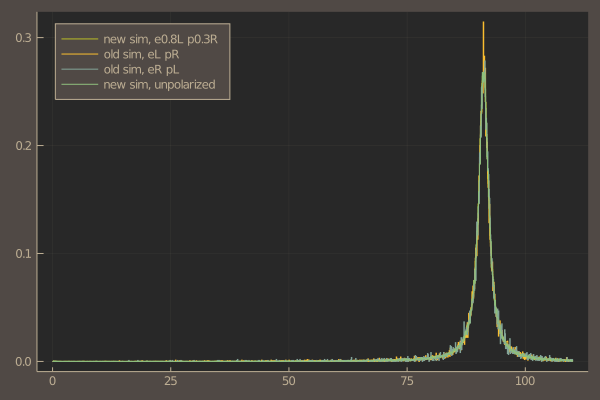

In [11]:
plot(ZMassList, seriestype=:stephist, label="new sim, e0.8L p0.3R", bins=0:0.1:110, normalized=true)
plot!(ZMassList_Old_eLpR, seriestype=:stephist, label="old sim, eL pR", bins=0:0.1:110, normalized=true)
plot!(ZMassList_Old_eRpL, seriestype=:stephist, label="old sim, eR pL", bins=0:0.1:110, normalized=true)
plot!(ZMassList_New_unpolarized, seriestype=:stephist, label="new sim, unpolarized", bins=0:0.1:110, normalized=true, legend=:topleft)

In [12]:
sqrtsList = Float64[]
sqrtsList_ep = Float64[]
sqrtsList_noPhotons = Float64[]
for FILENAME in fileList
    LCIO.open(FILENAME) do reader
        for (iEvent, event) in enumerate(reader)
            mcpList = getCollection(event, "MCParticle")
            e1 = mcpList[5]
            e2 = mcpList[6]
            H = mcpList[7]
            γ1 = mcpList[8]
            γ2 = mcpList[9]
            μ1 = mcpList[10]
            μ2 = mcpList[11]
            p = getMomentum(μ1) .+ getMomentum(μ2) .+ getMomentum(H) .+ getMomentum(γ1) .+ getMomentum(γ2)
            E = getEnergy(μ1) + getEnergy(μ2) + getEnergy(H) + getEnergy(γ1) + getEnergy(γ2)
            push!(sqrtsList, sqrt(E^2 - sum(p.^2)))
            p = getMomentum(e1) .+ getMomentum(e2)
            E = getEnergy(e1) + getEnergy(e2)
            push!(sqrtsList_ep, sqrt(E^2 - sum(p.^2)))
            p = getMomentum(μ1) .+ getMomentum(μ2) .+ getMomentum(e1) .+ getMomentum(e2) .+ getMomentum(H)
            E = getEnergy(μ1) + getEnergy(μ2) + getEnergy(e1) + getEnergy(e2) + getEnergy(H) 
            push!(sqrtsList_noPhotons, sqrt(E^2 - sum(p.^2)))
        end
    end
end
println(length(sqrtsList), "\t", length(sqrtsList_ep), "\t", length(sqrtsList_noPhotons))

100000	100000	100000


In [13]:
sqrtsList_Old_eLpR = Float64[]
sqrtsList_noPhotons_Old_eLpR = Float64[]
LCIO.open("/nfs/dust/ilc/user/jstrube/StrangeHiggs/data/E250-TDR_ws.Pe2e2h.Gwhizard-1_95.eL.pR.I106479.001.slcio") do reader
    for (iEvent, event) in enumerate(reader)
        mcpList = getCollection(event, "MCParticle")
        γ1 = mcpList[6]
        γ2 = mcpList[7]
        μ1 = mcpList[8]
        μ2 = mcpList[9]
        H = mcpList[10]
        p = getMomentum(μ1) .+ getMomentum(μ2) .+ getMomentum(H) .+ getMomentum(γ1) .+ getMomentum(γ2) 
        E = getEnergy(μ1) + getEnergy(μ2) + getEnergy(H) + getEnergy(γ1) + getEnergy(γ2) 
        push!(sqrtsList_Old_eLpR, sqrt(E^2 - sum(p.^2)))
        p = getMomentum(μ1) .+ getMomentum(μ2) .+ getMomentum(H) 
        E = getEnergy(μ1) + getEnergy(μ2) + getEnergy(H) 
        push!(sqrtsList_noPhotons_Old_eLpR, sqrt(E^2 - sum(p.^2)))
    end
end
println(length(sqrtsList_Old_eLpR), "\t", length(sqrtsList_noPhotons_Old_eLpR))

17143	17143


In [14]:
sqrtsList_Old_eRpL = Float64[]
sqrtsList_noPhotons_Old_eRpL = Float64[]
LCIO.open("/nfs/dust/ilc/user/jstrube/StrangeHiggs/data/E250-TDR_ws.Pe2e2h.Gwhizard-1_95.eR.pL.I106480.001.slcio") do reader
    for (iEvent, event) in enumerate(reader)
        mcpList = getCollection(event, "MCParticle")
        γ1 = mcpList[6]
        γ2 = mcpList[7]
        μ1 = mcpList[8]
        μ2 = mcpList[9]
        H = mcpList[10]
        p = getMomentum(μ1) .+ getMomentum(μ2) .+ getMomentum(H) .+ getMomentum(γ1) .+ getMomentum(γ2) 
        E = getEnergy(μ1) + getEnergy(μ2) + getEnergy(H) + getEnergy(γ1) + getEnergy(γ2) 
        push!(sqrtsList_Old_eRpL, sqrt(E^2 - sum(p.^2)))
        p = getMomentum(μ1) .+ getMomentum(μ2) .+ getMomentum(H)
        E = getEnergy(μ1) + getEnergy(μ2) + getEnergy(H)
        push!(sqrtsList_noPhotons_Old_eRpL, sqrt(E^2 - sum(p.^2)))
    end
end
println(length(sqrtsList_Old_eRpL), "\t", length(sqrtsList_noPhotons_Old_eRpL))

10983	10983


In [19]:
sqrtsList_New_unpolarized = Float64[]
sqrtsList_ep_New_unpolarized = Float64[]
sqrtsList_noPhotons_New_unpolarized = Float64[]

LCIO.open("/nfs/dust/ilc/user/jstrube/StrangeHiggs/data/E250-TDR_ws.Pe2e2h.Gwhizard-2_82.eR.pL.slcio") do reader
    for (iEvent, event) in enumerate(reader)
        mcpList = getCollection(event, "MCParticle")
        e1 = mcpList[3]
        e2 = mcpList[4]
        γ1 = mcpList[5]
        γ2 = mcpList[6]
        μ1 = mcpList[7]
        μ2 = mcpList[8]
        H = mcpList[9]
        p = getMomentum(μ1) .+ getMomentum(μ2) .+ getMomentum(H) .+ getMomentum(γ1) .+ getMomentum(γ2)
        E = getEnergy(μ1) + getEnergy(μ2) + getEnergy(H) + getEnergy(γ1) + getEnergy(γ2)
        push!(sqrtsList_New_unpolarized, sqrt(E^2 - sum(p.^2)))
        p = getMomentum(μ1) .+ getMomentum(μ2) .+ getMomentum(H) 
        E = getEnergy(μ1) + getEnergy(μ2) + getEnergy(H)
        push!(sqrtsList_noPhotons_New_unpolarized, sqrt(E^2 - sum(p.^2)))
        p = getMomentum(e1) .+ getMomentum(e2) 
        E = getEnergy(e1) + getEnergy(e2) 
        push!(sqrtsList_ep_New_unpolarized, sqrt(E^2 - sum(p.^2)))
    end
end
println(length(sqrtsList_New_unpolarized), "\t", length(sqrtsList_ep_New_unpolarized), "\t", length(sqrtsList_noPhotons_New_unpolarized))

100000	100000	100000


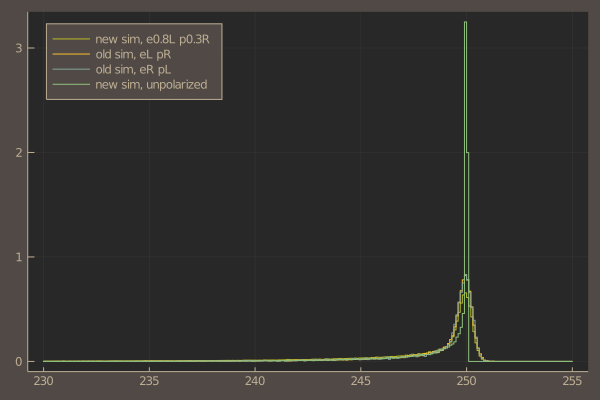

In [18]:
plot(sqrtsList, seriestype=:stephist, label="new sim, e0.8L p0.3R", bins=230:0.1:255, normalized=true)
plot!(sqrtsList_Old_eLpR, seriestype=:stephist, label="old sim, eL pR", bins=230:0.1:255, normalized=true)
plot!(sqrtsList_Old_eRpL, seriestype=:stephist, label="old sim, eR pL", bins=230:0.1:255, normalized=true)
plot!(sqrtsList_New_unpolarized, seriestype=:stephist, label="new sim, unpolarized", bins=230:0.1:255, normalized=true, legend=:topleft)

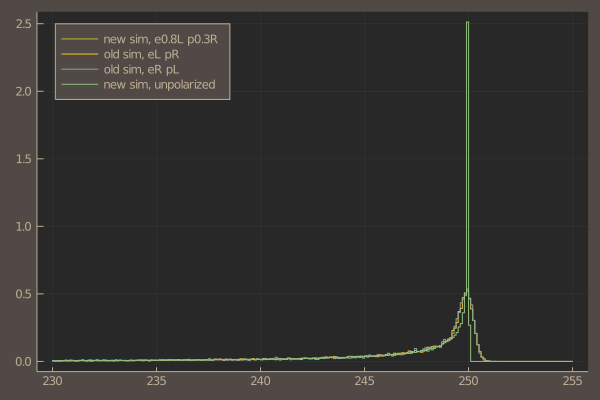

In [20]:
plot(sqrtsList_noPhotons, seriestype=:stephist, label="new sim, e0.8L p0.3R", bins=230:0.1:255, normalized=true)
plot!(sqrtsList_noPhotons_Old_eLpR, seriestype=:stephist, label="old sim, eL pR", bins=230:0.1:255, normalized=true)
plot!(sqrtsList_noPhotons_Old_eRpL, seriestype=:stephist, label="old sim, eR pL", bins=230:0.1:255, normalized=true)
plot!(sqrtsList_noPhotons_New_unpolarized, seriestype=:stephist, label="new sim, unpolarized", bins=230:0.1:255, normalized=true, legend=:topleft)